In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load the dataset
df=pd.read_csv('/content/weatherAUS_rainfall_prediction_dataset_cleaned.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [18]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [19]:
# Check for missing values
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [20]:
# Select relevant columns and drop rows with missing values
df = df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Rainfall']].dropna()

In [21]:
# Separate features (X) and target variable (y)
X = df[['MinTemp','MaxTemp', 'Humidity9am', 'Humidity3pm']]  # Features
y = df['Rainfall']                   # Target

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Initialize and train a Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 8.336867677030078
R² Score: 0.08207966907218212


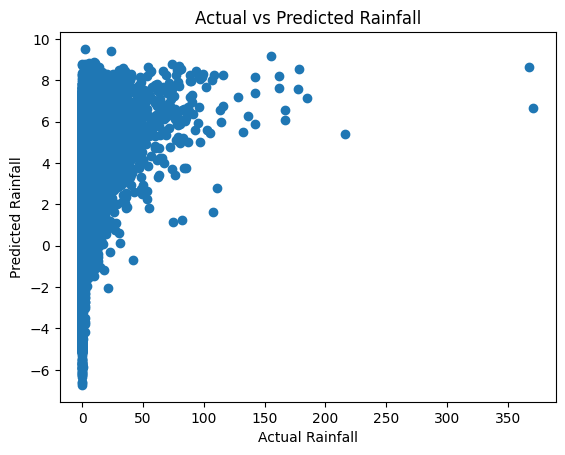

In [26]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()


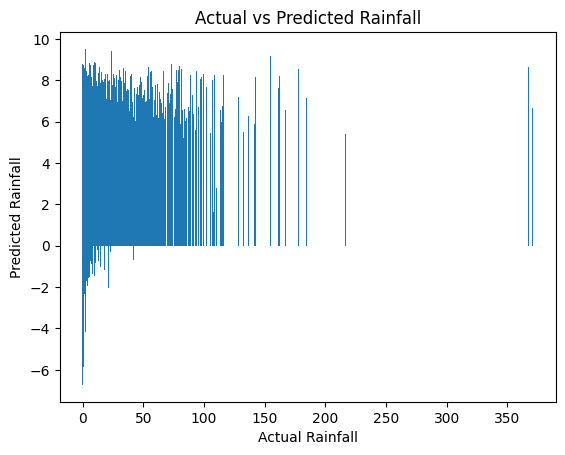

In [27]:
plt.bar(y_test, y_pred)
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()


/tmp/ipython-input-661320003.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Rainfall', data=avg_rainfall, palette='Blues')


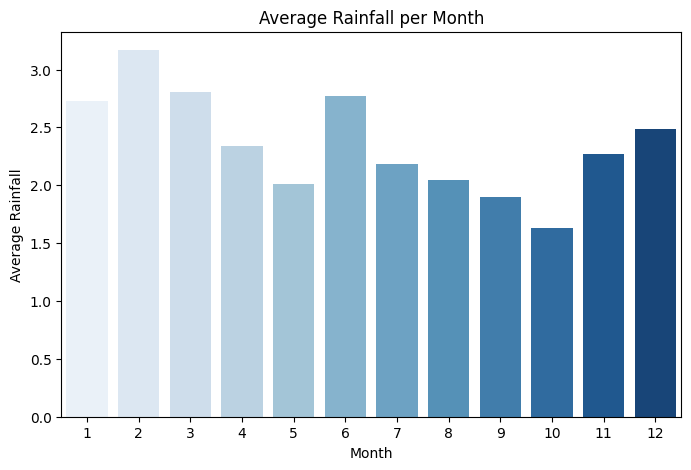

In [29]:
# Reload the original dataset to include the 'Date' column
original_df = pd.read_csv('/content/weatherAUS_rainfall_prediction_dataset_cleaned.csv')

# Convert 'Date' column to datetime objects
original_df['Date'] = pd.to_datetime(original_df['Date'])

# Extract month from the 'Date' column
original_df['Month'] = original_df['Date'].dt.month

# Calculate average rainfall per month
avg_rainfall = original_df.groupby('Month')['Rainfall'].mean().reset_index()

# Visualize the average rainfall per month
plt.figure(figsize=(8,5))
sns.barplot(x='Month', y='Rainfall', data=avg_rainfall, palette='Blues')
plt.title("Average Rainfall per Month")
plt.xlabel("Month")
plt.ylabel("Average Rainfall")
plt.show()

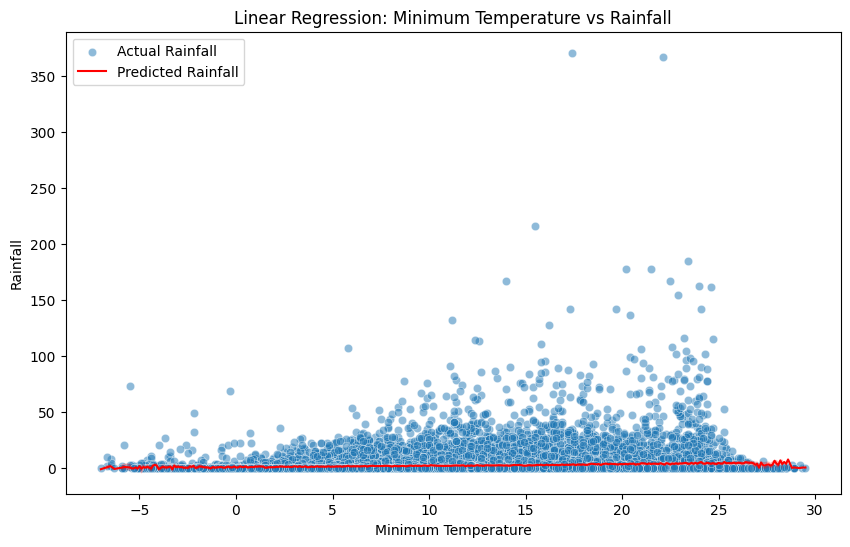

In [30]:
# Plotting the linear regression line for MinTemp vs Predicted Rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['MinTemp'], y=y_test, label='Actual Rainfall', alpha=0.5)
sns.lineplot(x=X_test['MinTemp'], y=y_pred, color='red', label='Predicted Rainfall')
plt.xlabel("Minimum Temperature")
plt.ylabel("Rainfall")
plt.title("Linear Regression: Minimum Temperature vs Rainfall")
plt.legend()
plt.show()